In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gamma

In [34]:
path = "profiling_results/"
filename = "batch_profiling_results_red_cuda_20240920_181007_ccmode.csv"
df = pd.read_csv(path+filename)

In [36]:
df

,model,batch_size,processing time (s),throughput (qps),cpu/interrupts/ctx_switches_count,cpu/interrupts/interrupts_count,cpu/interrupts/soft_interrupts_count,cpu/load/avg_sys_load_one_min_percent,cpu/load/avg_sys_load_five_min_percent,cpu/load/avg_sys_load_fifteen_min_percent,...,05_gpu_smi/gpu_0_bar1_total_MiB,05_gpu_smi/gpu_0_bar1_used_MiB,05_gpu_smi/gpu_0_bar1_free_MiB,05_gpu_smi/gpu_0_gpu_util_in_percent,05_gpu_smi/gpu_0_mem_util_in_percent,05_gpu_smi/gpu_0_temp_in_C,05_gpu_smi/gpu_0_clocks_throttle_reason_gpu_idle,05_gpu_smi/gpu_0_clocks_throttle_reason_applications_clocks_setting,05_gpu_smi/gpu_0_clocks_throttle_reason_sw_power_cap,05_gpu_smi/gpu_0_clocks_throttle_reason_hw_slowdown
0,granite-7b,1,1.900,0.53,25877,352776,26459,2.333333,0.583333,0.166667,...,131072.0,1.625,131070.375,86,40,30,0,0,0,0
1,granite-7b,1,1.326,0.75,26417,354956,27156,2.833333,0.666667,0.250000,...,131072.0,1.625,131070.375,84,39,30,0,0,0,0
2,granite-7b,1,1.296,0.77,27140,357402,28037,2.833333,0.666667,0.250000,...,131072.0,1.625,131070.375,84,39,31,0,0,0,0
3,granite-7b,1,1.308,0.76,27828,359585,28710,3.250000,0.833333,0.250000,...,131072.0,1.625,131070.375,86,39,31,0,0,0,0
4,granite-7b,1,1.317,0.76,28368,361723,29376,3.250000,0.833333,0.250000,...,131072.0,1.625,131070.375,85,39,31,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,llama3-8b,211,22.576,9.35,2550973,6283666,1661023,8.166667,8.166667,8.000000,...,131072.0,1.625,131070.375,85,36,47,0,0,0,0
623,llama3-8b,211,26.076,8.09,2571326,6329710,1673100,7.833333,8.083333,8.000000,...,131072.0,1.625,131070.375,79,34,46,0,0,0,0
624,llama3-8b,211,27.430,7.69,2592645,6378305,1686006,8.000000,8.083333,8.000000,...,131072.0,1.625,131070.375,69,31,46,0,0,0,0
625,llama3-8b,211,20.267,10.41,2612588,6417701,1696910,8.083333,8.166667,8.083333,...,131072.0,1.625,131070.375,26,11,47,0,0,0,0


In [37]:
grouped_df = df.groupby(['model', 'batch_size']).mean().reset_index()
grouped_df

,model,batch_size,processing time (s),throughput (qps),cpu/interrupts/ctx_switches_count,cpu/interrupts/interrupts_count,cpu/interrupts/soft_interrupts_count,cpu/load/avg_sys_load_one_min_percent,cpu/load/avg_sys_load_five_min_percent,cpu/load/avg_sys_load_fifteen_min_percent,...,05_gpu_smi/gpu_0_bar1_total_MiB,05_gpu_smi/gpu_0_bar1_used_MiB,05_gpu_smi/gpu_0_bar1_free_MiB,05_gpu_smi/gpu_0_gpu_util_in_percent,05_gpu_smi/gpu_0_mem_util_in_percent,05_gpu_smi/gpu_0_temp_in_C,05_gpu_smi/gpu_0_clocks_throttle_reason_gpu_idle,05_gpu_smi/gpu_0_clocks_throttle_reason_applications_clocks_setting,05_gpu_smi/gpu_0_clocks_throttle_reason_sw_power_cap,05_gpu_smi/gpu_0_clocks_throttle_reason_hw_slowdown
0,gemma-7b,1,1.2158,2.732000,6.706276e+05,2056236.6,4.589810e+05,7.891667,7.116667,4.650000,...,131072.0,1.625,131070.375,65.500000,36.300000,35.700000,0.0,0.0,0.000000,0.0
1,gemma-7b,2,1.4984,1.346000,6.778822e+05,2081136.8,4.667625e+05,6.033333,6.750000,4.583333,...,131072.0,1.625,131070.375,89.200000,46.600000,35.500000,0.0,0.0,0.000000,0.0
2,gemma-7b,3,1.5103,1.986000,6.866814e+05,2108262.0,4.756166e+05,5.150000,6.458333,4.541667,...,131072.0,1.625,131070.375,91.000000,48.200000,37.000000,0.0,0.0,0.000000,0.0
3,gemma-7b,4,1.5752,2.542000,6.983292e+05,2138338.6,4.857432e+05,6.733333,6.733333,4.691667,...,131072.0,1.625,131070.375,92.100000,49.500000,37.500000,0.0,0.0,0.000000,0.0
4,gemma-7b,5,1.6296,3.077000,7.138616e+05,2176556.9,5.002340e+05,6.450000,6.675000,4.716667,...,131072.0,1.625,131070.375,92.600000,49.400000,39.100000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,llama3-8b,128,14.5950,8.988000,1.928933e+06,4914392.1,1.293278e+06,8.225000,8.191667,7.466667,...,131072.0,1.625,131070.375,71.600000,34.000000,47.300000,0.0,0.0,0.000000,0.0
60,llama3-8b,149,18.7660,8.142000,2.068936e+06,5217666.5,1.374798e+06,8.016667,8.075000,7.600000,...,131072.0,1.625,131070.375,49.700000,25.700000,47.500000,0.0,0.0,0.000000,0.0
61,llama3-8b,167,20.4037,8.539000,2.227981e+06,5572964.6,1.469664e+06,8.475000,8.308333,7.833333,...,131072.0,1.625,131070.375,70.900000,37.600000,47.100000,0.0,0.0,0.000000,0.0
62,llama3-8b,191,22.2688,8.655000,2.405700e+06,5959433.8,1.573252e+06,8.191667,8.191667,7.933333,...,131072.0,1.625,131070.375,50.000000,26.700000,46.800000,0.0,0.0,0.000000,0.0


In [41]:
grouped_df.loc[:,"processing_time_std"] = df.groupby(['model', 'batch_size']).std().reset_index()["processing time (s)"]
grouped_df.loc[:,"throughput_std"] = df.groupby(['model', 'batch_size']).std().reset_index()["throughput (qps)"]

In [42]:
grouped_df

,model,batch_size,processing time (s),throughput (qps),cpu/interrupts/ctx_switches_count,cpu/interrupts/interrupts_count,cpu/interrupts/soft_interrupts_count,cpu/load/avg_sys_load_one_min_percent,cpu/load/avg_sys_load_five_min_percent,cpu/load/avg_sys_load_fifteen_min_percent,...,05_gpu_smi/gpu_0_bar1_free_MiB,05_gpu_smi/gpu_0_gpu_util_in_percent,05_gpu_smi/gpu_0_mem_util_in_percent,05_gpu_smi/gpu_0_temp_in_C,05_gpu_smi/gpu_0_clocks_throttle_reason_gpu_idle,05_gpu_smi/gpu_0_clocks_throttle_reason_applications_clocks_setting,05_gpu_smi/gpu_0_clocks_throttle_reason_sw_power_cap,05_gpu_smi/gpu_0_clocks_throttle_reason_hw_slowdown,processing_time_std,throughput_std
0,gemma-7b,1,1.2158,2.732000,6.706276e+05,2056236.6,4.589810e+05,7.891667,7.116667,4.650000,...,131070.375,65.500000,36.300000,35.700000,0.0,0.0,0.000000,0.0,0.592901,4.352350
1,gemma-7b,2,1.4984,1.346000,6.778822e+05,2081136.8,4.667625e+05,6.033333,6.750000,4.583333,...,131070.375,89.200000,46.600000,35.500000,0.0,0.0,0.000000,0.0,0.130124,0.146833
2,gemma-7b,3,1.5103,1.986000,6.866814e+05,2108262.0,4.756166e+05,5.150000,6.458333,4.541667,...,131070.375,91.000000,48.200000,37.000000,0.0,0.0,0.000000,0.0,0.033350,0.043767
3,gemma-7b,4,1.5752,2.542000,6.983292e+05,2138338.6,4.857432e+05,6.733333,6.733333,4.691667,...,131070.375,92.100000,49.500000,37.500000,0.0,0.0,0.000000,0.0,0.068652,0.102935
4,gemma-7b,5,1.6296,3.077000,7.138616e+05,2176556.9,5.002340e+05,6.450000,6.675000,4.716667,...,131070.375,92.600000,49.400000,39.100000,0.0,0.0,0.000000,0.0,0.099636,0.168724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,llama3-8b,128,14.5950,8.988000,1.928933e+06,4914392.1,1.293278e+06,8.225000,8.191667,7.466667,...,131070.375,71.600000,34.000000,47.300000,0.0,0.0,0.000000,0.0,2.405897,1.489913
60,llama3-8b,149,18.7660,8.142000,2.068936e+06,5217666.5,1.374798e+06,8.016667,8.075000,7.600000,...,131070.375,49.700000,25.700000,47.500000,0.0,0.0,0.000000,0.0,3.087704,1.388195
61,llama3-8b,167,20.4037,8.539000,2.227981e+06,5572964.6,1.469664e+06,8.475000,8.308333,7.833333,...,131070.375,70.900000,37.600000,47.100000,0.0,0.0,0.000000,0.0,4.160648,1.954615
62,llama3-8b,191,22.2688,8.655000,2.405700e+06,5959433.8,1.573252e+06,8.191667,8.191667,7.933333,...,131070.375,50.000000,26.700000,46.800000,0.0,0.0,0.000000,0.0,2.117477,0.925050


In [42]:
grouped_df.to_csv("profiling_results/batch_profiling_results_red_cuda_ccmode_grouped.csv", index=False)

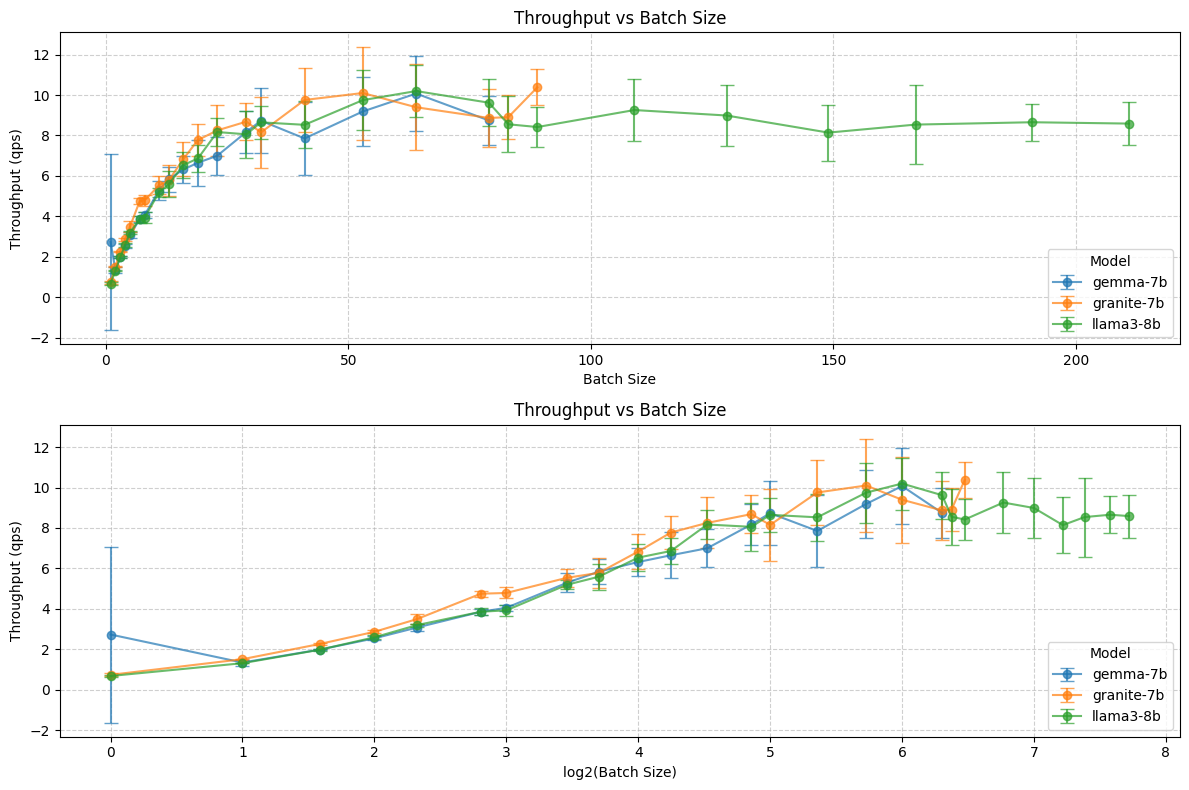

In [55]:
fig, ax = plt.subplots(figsize = (12,8), nrows=2, ncols=1)

grouped = grouped_df.groupby('model')

# Plot for each model
for model, group in grouped:
    ax[0].errorbar(group['batch_size'], group['throughput (qps)'], yerr=group['throughput_std'], 
                 label=model, fmt='-o', capsize=5, alpha = 0.7)

for model, group in grouped:
    ax[1].errorbar(np.log2(group['batch_size']), group['throughput (qps)'], yerr=group['throughput_std'], 
                 label=model, fmt='-o', capsize=5, alpha = 0.7)

# Set plot labels and title
ax[0].set_xlabel('Batch Size')
ax[0].set_ylabel('Throughput (qps)')
ax[0].set_title('Throughput vs Batch Size')
ax[0].legend(title='Model', loc="lower right")
ax[0].grid(linestyle = "--", alpha = 0.6)
ax[1].set_xlabel('log2(Batch Size)')
ax[1].set_ylabel('Throughput (qps)')
ax[1].set_title('Throughput vs Batch Size')
ax[1].legend(title='Model', loc="lower right")
ax[1].grid(linestyle = "--", alpha = 0.6)

fig.tight_layout()

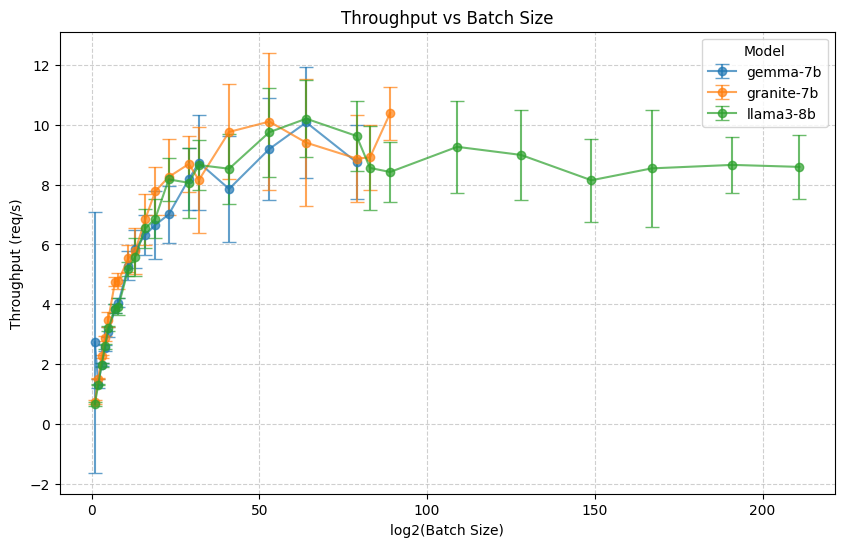

In [43]:
plt.figure(figsize=(10, 6))

# Group data by model alias
grouped = grouped_df.groupby('model')


# Set plot labels and title
plt.xlabel('log2(Batch Size)')
plt.ylabel('Throughput (req/s)')
plt.title('Throughput vs Batch Size')
plt.legend(title='Model')
plt.grid(linestyle = "--", alpha = 0.6)

# Show the plot
plt.show()

In [32]:
path = "gpu_utilization/"
filename = "gpu_usage_20240912_123045.csv"
df = pd.read_csv(path+filename, header= None, names=['time', 'utilization'])

# Remove the '%' symbol and convert the column to integers
df['utilization'] = df['utilization'].str.replace('%', '').astype(int)

# Calculate the mean utilization
mean_utilization = df['utilization'].mean()

print(f"Mean GPU Utilization: {mean_utilization:.2f}%")

Mean GPU Utilization: 74.10%


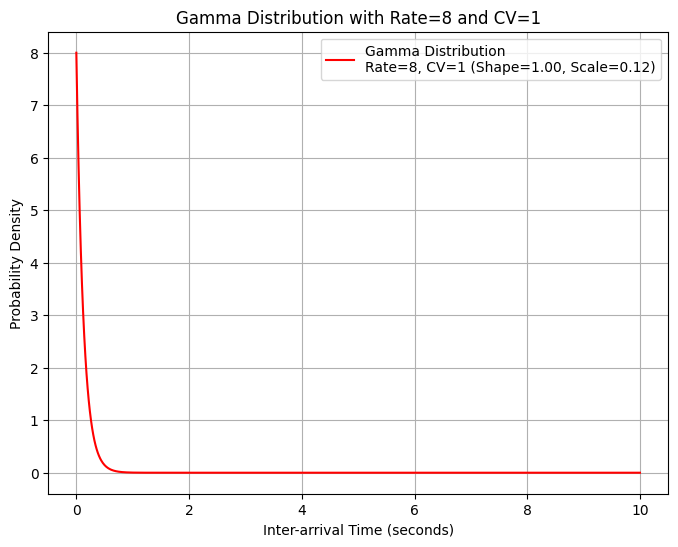

In [33]:
# Given rate and CV
rate = 8  # Rate (inverse of scale)
cv = 1  # Coefficient of Variation

# We need to compute alpha and scale (theta)
# CV = 1 / sqrt(alpha), so alpha = 1 / CV^2
alpha = 1 / cv**2

# Scale (theta) is 1 / rate
theta = 1 / rate

# Create a range of values for the x-axis
x_cv = np.linspace(0, 10, 1000)

# Compute the Gamma distribution's probability density function (PDF) with the new parameters
pdf_cv = gamma.pdf(x_cv, alpha, scale=theta)

# Plot the Gamma distribution with the given rate and CV
plt.figure(figsize=(8, 6))
plt.plot(x_cv, pdf_cv, label=f'Gamma Distribution\nRate={rate}, CV={cv} (Shape={alpha:.2f}, Scale={theta:.2f})', color='r')
plt.title(f'Gamma Distribution with Rate={rate} and CV={cv}')
plt.xlabel('Inter-arrival Time (seconds)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


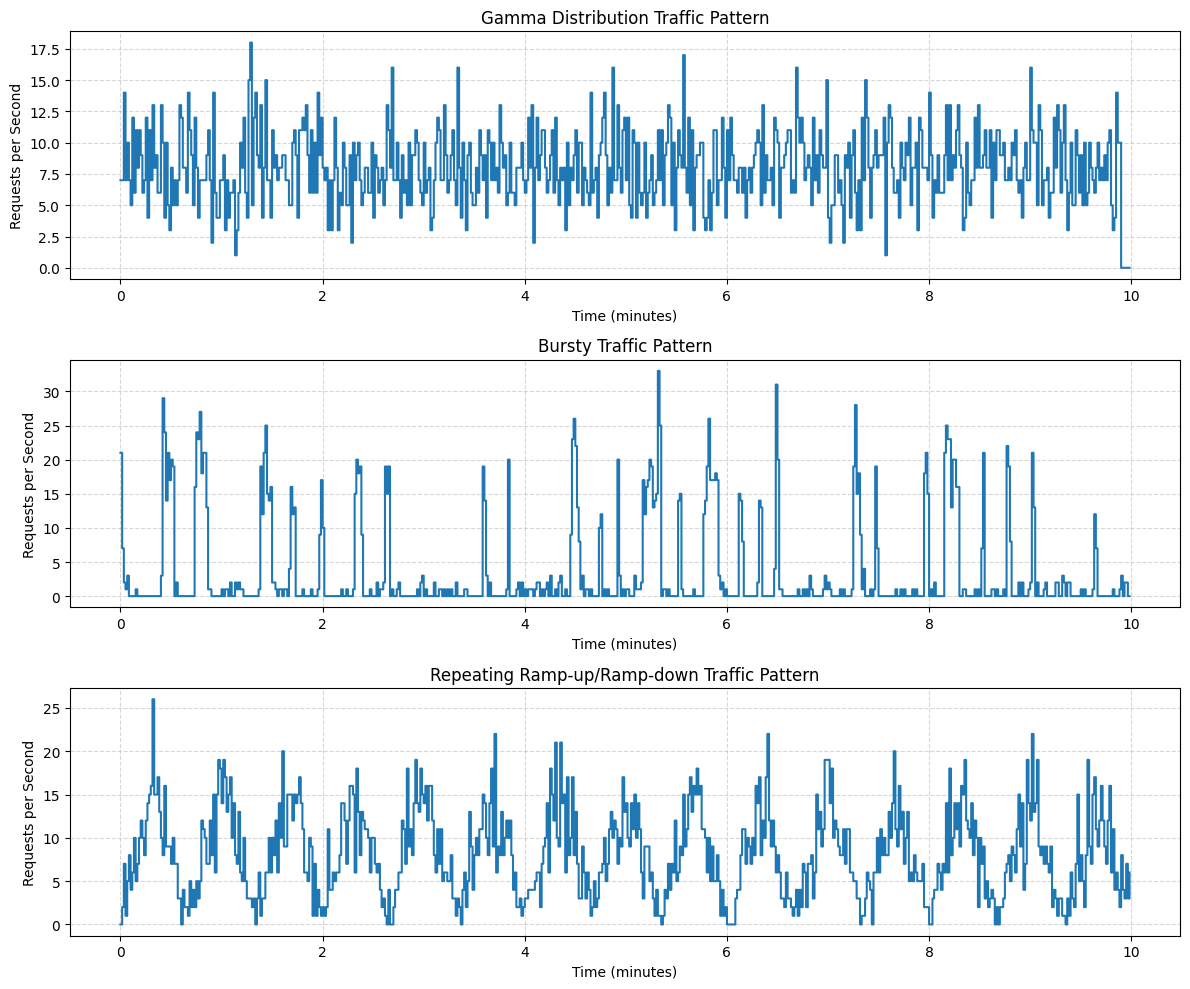

In [60]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

# Set up the figure and axes for subplots (1 column, 3 rows)
fig, ax = plt.subplots(figsize=(12, 10), nrows=3, ncols=1)

# Plot 1: Gamma Distribution Traffic Pattern
# Parameters
run_duration = 10 * 60  # Total time in seconds (e.g., 10 minutes)
rate = 8                # Average rate (requests per second)
shape = 1.0             # Shape parameter (alpha)
scale = 1 / rate        # Scale parameter (theta)
# Generate inter-arrival times using Gamma distribution
inter_arrival_times = np.random.gamma(shape, scale, size=int(run_duration * rate))
# Generate arrival times by accumulating inter-arrival times
arrival_times = np.cumsum(inter_arrival_times)
arrival_times = arrival_times[arrival_times <= run_duration]
# Create time bins (e.g., per second)
time_bins = np.arange(0, run_duration + 1)
# Count the number of requests per second
request_counts, _ = np.histogram(arrival_times, bins=time_bins)
# Convert time bins to minutes for the x-axis
time_bins_minutes = time_bins / 60
# Plotting on the first axis
ax[0].step(time_bins_minutes[:-1], request_counts, where='post')
ax[0].set_title('Gamma Distribution Traffic Pattern')
ax[0].set_xlabel('Time (minutes)')
ax[0].set_ylabel('Requests per Second')
ax[0].grid(True, alpha = 0.5, linestyle="--")

# Plot 2: Bursty Traffic Pattern
# Initialize variables
current_time = 0
arrival_times = []

while current_time < run_duration:
    is_burst = np.random.choice([True, False], p=[0.5, 0.5])
    if is_burst:
        burst_duration = np.random.uniform(1, 3)
        burst_rate = np.random.uniform(15, 25)
        num_requests = int(burst_duration * burst_rate)
        inter_arrival_times = np.random.exponential(1 / burst_rate, size=num_requests)
    else:
        idle_duration = np.random.uniform(8, 15)
        idle_rate = np.random.uniform(0, 1)
        num_requests = int(idle_duration * idle_rate)
        inter_arrival_times = np.random.exponential(1 / idle_rate, size=num_requests) if idle_rate > 0 else []

    if inter_arrival_times.size > 0:
        cumulative_times = current_time + np.cumsum(inter_arrival_times)
        arrival_times.extend(cumulative_times[cumulative_times <= current_time + (burst_duration if is_burst else idle_duration)])

    current_time += burst_duration if is_burst else idle_duration

arrival_times = np.array(arrival_times)
arrival_times = arrival_times[arrival_times <= run_duration]

request_counts, _ = np.histogram(arrival_times, bins=time_bins)
time_bins_minutes = time_bins / 60

# Plotting on the second axis
ax[1].step(time_bins_minutes[:-1], request_counts, where='post')
ax[1].set_title('Bursty Traffic Pattern')
ax[1].set_xlabel('Time (minutes)')
ax[1].set_ylabel('Number of Requests per Second')
ax[1].grid(True, alpha = 0.5, linestyle="--")

# Plot 3: Repeating Ramp-up/Ramp-down Traffic Pattern
min_rate = 1
max_rate = 15
ramp_up_duration = 20
ramp_down_duration = 20
cycle_duration = ramp_up_duration + ramp_down_duration

arrival_times = []
current_time = 0

while current_time < run_duration:
    time_in_cycle = (current_time % cycle_duration)
    if time_in_cycle < ramp_up_duration:
        current_rate = min_rate + (max_rate - min_rate) * (time_in_cycle / ramp_up_duration)
    else:
        time_in_ramp_down = time_in_cycle - ramp_up_duration
        current_rate = max_rate - (max_rate - min_rate) * (time_in_ramp_down / ramp_down_duration)
    
    inter_arrival_time = np.random.exponential(1 / current_rate)
    current_time += inter_arrival_time
    if current_time <= run_duration:
        arrival_times.append(current_time)

arrival_times = np.array(arrival_times)
request_counts, _ = np.histogram(arrival_times, bins=time_bins)
time_bins_minutes = time_bins / 60

# Plotting on the third axis
ax[2].step(time_bins_minutes[:-1], request_counts, where='post')
ax[2].set_title('Repeating Ramp-up/Ramp-down Traffic Pattern')
ax[2].set_xlabel('Time (minutes)')
ax[2].set_ylabel('Number of Requests per Second')
ax[2].grid(True, alpha = 0.5, linestyle="--")

# Adjust layout and show the combined plot
plt.tight_layout()
plt.show()


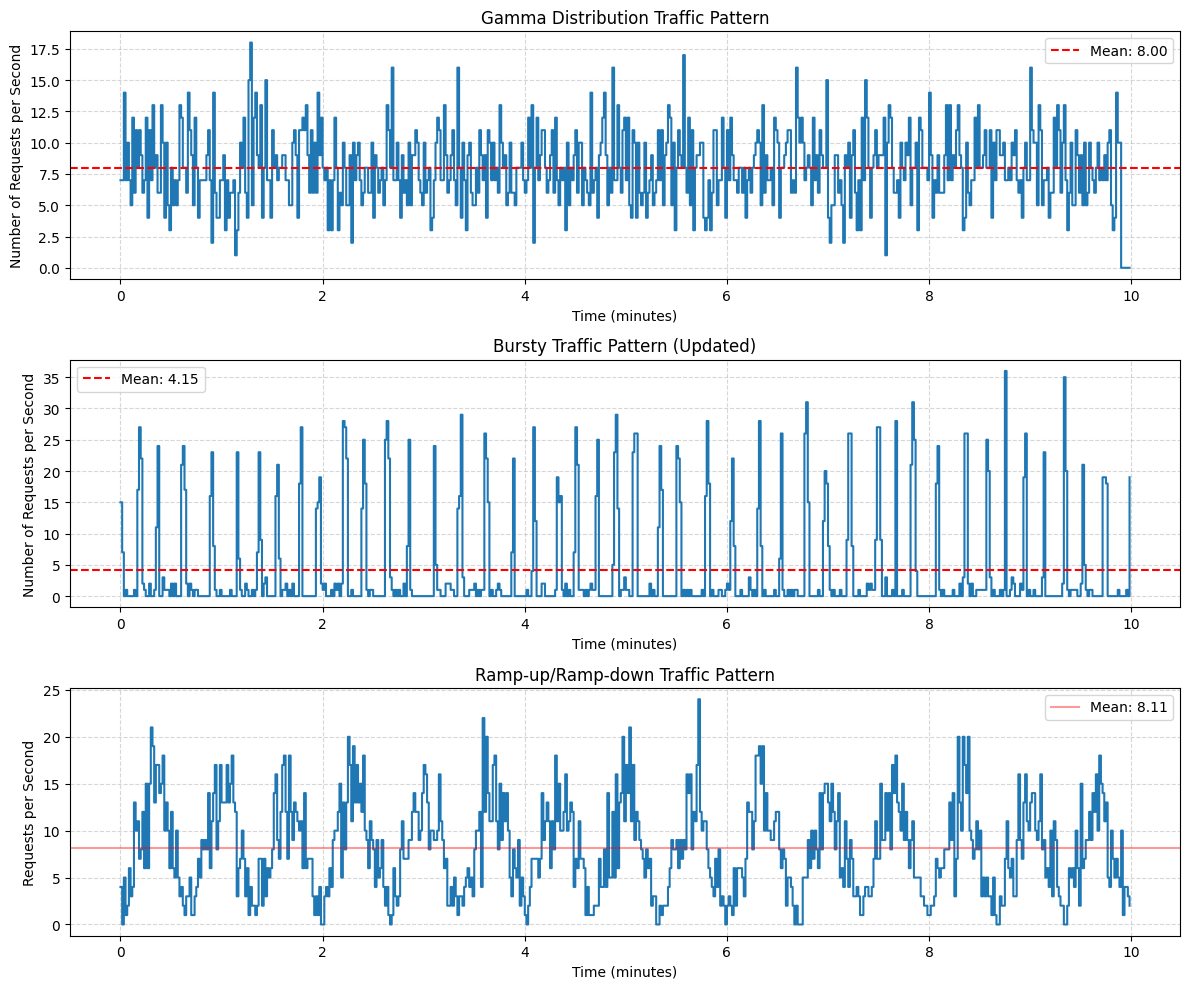

In [76]:

fig, ax = plt.subplots(figsize=(12, 10), nrows=3, ncols=1)

np.random.seed(42)

# Plot 1: Gamma Distribution Traffic Pattern
# Generate inter-arrival times using Gamma distribution
inter_arrival_times = np.random.gamma(shape, scale, size=int(run_duration * rate))
arrival_times = np.cumsum(inter_arrival_times)
arrival_times = arrival_times[arrival_times <= run_duration]
request_counts, _ = np.histogram(arrival_times, bins=time_bins)
# Plot Gamma Distribution
gamma_mean = np.mean(request_counts)
ax[0].step(time_bins_minutes[:-1], request_counts, where='post')
ax[0].axhline(gamma_mean, color='r', linestyle='-', label=f'Mean: {gamma_mean:.2f}', alpha = 0.4)
ax[0].set_title('Gamma Distribution Traffic Pattern')
ax[0].set_xlabel('Time (minutes)')
ax[0].set_ylabel('Number of Requests per Second')
ax[0].grid(True, linestyle="--", alpha=0.5)
ax[0].legend()


# Plot 2: Bursty Traffic Pattern (Updated)
arrival_times = []
current_time = 0
while current_time < run_duration:
    burst_duration = np.random.uniform(1, 3)
    burst_rate = np.random.uniform(20, 30)
    num_requests = int(burst_duration * burst_rate)
    inter_arrival_times = np.random.exponential(1 / burst_rate, size=num_requests) 
    if inter_arrival_times.size > 0:
        cumulative_times = current_time + np.cumsum(inter_arrival_times)
        arrival_times.extend(cumulative_times[cumulative_times <= current_time + burst_duration])
    current_time += burst_duration   
    idle_duration = np.random.uniform(8, 15)
    idle_rate = np.random.uniform(0, 1)
    num_requests = int(idle_duration * idle_rate)
    inter_arrival_times = np.random.exponential(1 / idle_rate, size=num_requests) if idle_rate > 0 else []
    if inter_arrival_times.size > 0:
        cumulative_times = current_time + np.cumsum(inter_arrival_times)
        arrival_times.extend(cumulative_times[cumulative_times <= current_time + idle_duration])   
    current_time += idle_duration
arrival_times = np.array(arrival_times)
request_counts, _ = np.histogram(arrival_times, bins=time_bins)
# Plot Bursty Traffic
bursty_mean = np.mean(request_counts)
ax[1].step(time_bins_minutes[:-1], request_counts, where='post')
ax[1].axhline(bursty_mean, color='r', linestyle='-', label=f'Mean: {bursty_mean:.2f}', alpha = 0.4)
ax[1].set_title('Bursty Traffic Pattern (Updated)')
ax[1].set_xlabel('Time (minutes)')
ax[1].set_ylabel('Number of Requests per Second')
ax[1].grid(True, linestyle="--", alpha=0.5)
ax[1].legend()


# Plot 3: Repeating Ramp-up/Ramp-down Traffic Pattern
arrival_times = []
current_time = 0
while current_time < run_duration:
    time_in_cycle = (current_time % cycle_duration)
    if time_in_cycle < ramp_up_duration:
        current_rate = min_rate + (max_rate - min_rate) * (time_in_cycle / ramp_up_duration)
    else:
        time_in_ramp_down = time_in_cycle - ramp_up_duration
        current_rate = max_rate - (max_rate - min_rate) * (time_in_ramp_down / ramp_down_duration) 
    inter_arrival_time = np.random.exponential(1 / current_rate)
    current_time += inter_arrival_time
    if current_time <= run_duration:
        arrival_times.append(current_time)
arrival_times = np.array(arrival_times)
request_counts, _ = np.histogram(arrival_times, bins=time_bins)
# Plot Ramp-up/Ramp-down Traffic
ramp_mean = np.mean(request_counts)
ax[2].step(time_bins_minutes[:-1], request_counts, where='post')
ax[2].axhline(ramp_mean, color='r', linestyle='-', label=f'Mean: {ramp_mean:.2f}', alpha = 0.4)
ax[2].set_title('Ramp-up/Ramp-down Traffic Pattern')
ax[2].set_xlabel('Time (minutes)')
ax[2].set_ylabel('Requests per Second')
ax[2].grid(True, linestyle="--", alpha=0.5)
ax[2].legend()

plt.tight_layout()
plt.show()
